In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_stata("/users/quasar/downloads/Dataset/Master_thesis_data/JEDC_dataset/10SD_jan15.dta")
df

,Country,Regioncode,Region,Variable,Year,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM
0,BWA,SSA,Sub-saharan Africa,VA,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BWA,SSA,Sub-saharan Africa,VA,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BWA,SSA,Sub-saharan Africa,VA,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BWA,SSA,Sub-saharan Africa,VA,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BWA,SSA,Sub-saharan Africa,VA,1964,16.30,3.49,0.74,0.10,0.66,6.24,1.66,1.12,4.82,2.34,37.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7551,EGY,MENA,Middle East and North Africa,EMP,2008,"5,225.14",31.98,"2,500.13",289.87,"2,376.25","2,814.70","1,806.55",749.22,"5,246.05",NaN,"21,039.90"
7552,EGY,MENA,Middle East and North Africa,EMP,2009,"5,218.60",30.56,"2,541.43",301.08,"2,662.40","3,012.24","1,898.16",784.55,"5,414.84",NaN,"21,863.86"
7553,EGY,MENA,Middle East and North Africa,EMP,2010,"5,205.53",29.00,"2,435.55",307.27,"2,732.95","2,977.06","1,992.27",801.30,"5,538.95",NaN,"22,019.88"
7554,EGY,MENA,Middle East and North Africa,EMP,2011,"5,185.92",27.56,"2,373.81",318.00,"2,795.26","3,020.24","2,048.33",814.74,"5,635.52",NaN,"22,219.39"


In [3]:
df.Variable.unique()

array(['VA', 'VA_Q05', 'EMP', 'VA_Q10', 'VA_Q91'], dtype=object)

In [4]:
df.set_index(['Country','Year']).head()

Regioncode              Region Variable   AGR  MIN  MAN   PU  CON  WRT  TRA  FIRE  GOV  OTH   SUM
Country Year                                                                                                  
BWA     1960        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1961        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1962        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1963        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1964        SSA  Sub-saharan Africa       VA 16.30 3.49 0.74 0.10 0.66 6.24 1.66  1.12 4.82 2.34 37.48

In [5]:
df_emp = df.loc[df.Variable == 'EMP']
df_VA = df.loc[df.Variable == 'VA']

In [6]:
df_VA['agri'] = df_VA.AGR
df_VA['manufacturing'] = df_VA.MIN + df_VA.MAN
df_VA['service'] = df_VA.PU + df_VA.CON + df_VA.WRT + df_VA.TRA + df_VA.FIRE + df_VA.GOV + df_VA.OTH
df_VA['agri_share'] = df_VA.AGR / df_VA.SUM
df_VA['manu_share'] = df_VA.manufacturing / df_VA.SUM
df_VA['service_share'] = df_VA.service / df_VA.SUM

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_852/3828441527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['agri'] = df_VA.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_852/3828441527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['manufacturing'] = df_VA.MIN + df_VA.MAN
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_852/3828441527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [7]:
df_emp['agri'] = df_emp.AGR
df_emp['manufacturing'] = df_emp.MIN + df_emp.MAN
df_emp['service'] = df_emp.PU + df_emp.CON + df_emp.WRT + df_emp.TRA + df_emp.FIRE + df_emp.GOV + df_emp.OTH
df_emp['agri_share'] = df_emp.AGR / df_emp.SUM
df_emp['manu_share'] = df_emp.manufacturing / df_emp.SUM
df_emp['service_share'] = df_emp.service / df_emp.SUM

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_852/2393954976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp['agri'] = df_emp.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_852/2393954976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp['manufacturing'] = df_emp.MIN + df_emp.MAN
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_852/2393954976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [66]:
df_emp_ind = df_emp.loc[(df_emp['Country'] == 'IND') & (df_emp['Year'] >= 1960) & (df_emp['Year'] <=2015)]
df_emp_ind = df_emp_ind.set_index('Year')
df_emp_ind.tail()

,Country,Regioncode,Region,Variable,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM,agri,manufacturing,service,agri_share,manu_share,service_share
Year,,,,,,,,,,,,,,,,,,,,,
2006,IND,ASI,Asia,EMP,"270,083.85","2,538.77","53,873.35","1,169.24","28,697.90","49,848.85","19,613.56","8,174.32","22,255.85","15,512.27","471,767.96","270,083.85","56,412.11","145,271.99",0.57,0.12,0.31
2007,IND,ASI,Asia,EMP,"254,922.60","2,356.69","54,890.13","1,182.80","30,004.19","49,865.61","20,371.07","8,816.18","22,323.72","15,497.10","460,230.08","254,922.60","57,246.82","148,060.67",0.55,0.12,0.32
2008,IND,ASI,Asia,EMP,"252,102.30","2,408.62","56,333.80","1,206.25","31,476.99","51,289.44","21,150.09","9,370.89","22,460.77","15,579.53","463,378.67","252,102.30","58,742.41","152,533.95",0.54,0.13,0.33
2009,IND,ASI,Asia,EMP,"250,239.12","2,421.82","56,572.88","1,228.12","32,700.35","52,656.33","21,924.66","9,923.18","22,544.38","15,616.84","465,827.68","250,239.12","58,994.69","156,593.86",0.54,0.13,0.34
2010,IND,ASI,Asia,EMP,"255,855.33","2,289.67","54,255.97","1,184.82","33,534.48","54,114.20","22,468.33","10,429.98","19,365.84","14,600.48","468,099.10","255,855.33","56,545.63","155,698.13",0.55,0.12,0.33


<AxesSubplot:title={'center':'India Labour share'}, xlabel='Year'>

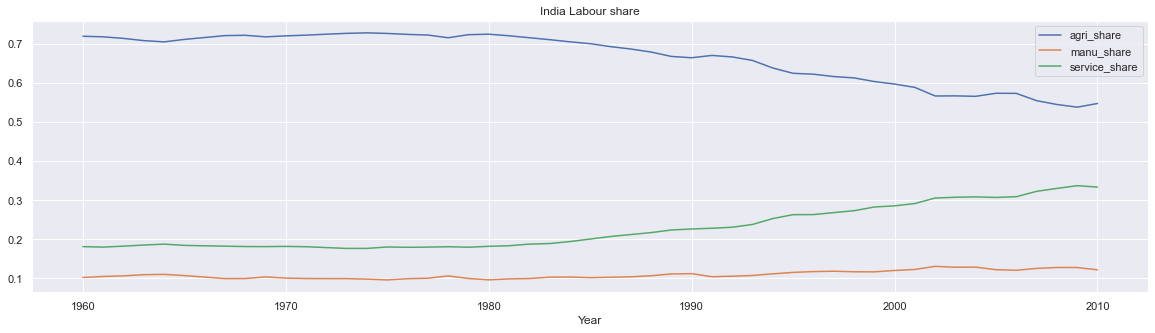

In [67]:
df_emp_ind[['agri_share', 'manu_share', 'service_share']].plot(figsize = (20, 5), title= 'India Labour share')

In [68]:
df_VA_Q05 = df.loc[df.Variable == 'VA_Q05']
df_VA_Q05_ind = df_VA_Q05.loc[(df_VA_Q05['Country'] == 'IND') & (df_VA_Q05['Year'] >= 1960) & (df_VA_Q05['Year'] <= 2015)]
df_VA_Q05_ind = df_VA_Q05_ind.set_index('Year')
df_VA_Q05_ind.head()

,Country,Regioncode,Region,Variable,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM
Year,,,,,,,,,,,,,,,
1960,IND,ASI,Asia,VA_Q05,"2,098,330.19","97,275.31","460,855.72","21,517.77","271,735.40","412,117.68","134,972.78","159,540.75","225,650.56","101,100.46","3,983,096.61"
1961,IND,ASI,Asia,VA_Q05,"2,100,100.93","102,882.65","500,210.52","24,575.25","281,286.19","438,483.47","144,243.49","166,402.38","240,086.59","105,081.24","4,103,352.73"
1962,IND,ASI,Asia,VA_Q05,"2,058,324.52","115,072.54","536,622.91","27,575.05","291,761.25","461,469.04","155,485.14","172,002.46","271,201.14","109,711.36","4,199,225.41"
1963,IND,ASI,Asia,VA_Q05,"2,106,462.49","118,485.71","587,379.56","32,593.94","327,396.99","495,271.34","165,412.83","177,325.62","301,474.75","114,397.95","4,426,201.19"
1964,IND,ASI,Asia,VA_Q05,"2,300,785.11","120,192.29","627,995.40","35,593.73","353,687.34","531,642.62","173,734.57","182,187.22","333,850.70","119,423.33","4,779,092.33"


In [69]:
df_VA_Q05_ind['agri_const'] = df_VA_Q05_ind.AGR
df_VA_Q05_ind['manufacturing_const'] = df_VA_Q05_ind.MIN + df_VA_Q05_ind.MAN
df_VA_Q05_ind['service_const'] = df_VA_Q05_ind.PU + df_VA_Q05_ind.CON + df_VA_Q05_ind.WRT + df_VA_Q05_ind.TRA + df_VA_Q05_ind.FIRE + df_VA_Q05_ind.GOV + df_VA_Q05_ind.OTH
df_VA_Q05_ind['agri_share_const'] = df_VA_Q05_ind.AGR / df_VA_Q05_ind.SUM
df_VA_Q05_ind['manu_share_const'] = df_VA_Q05_ind.manufacturing_const / df_VA_Q05_ind.SUM
df_VA_Q05_ind['service_share_const'] = df_VA_Q05_ind.service_const / df_VA_Q05_ind.SUM

agri_productivity_ind_constant =  (df_VA_Q05_ind['agri_const'] * 1000000) / (df_emp_ind['agri'] * 1000) 
manu_productivity_ind_constant =  (df_VA_Q05_ind['manufacturing_const'] * 1000000) / (df_emp_ind['manufacturing'] * 1000) 
service_productivity_ind_constant =  (df_VA_Q05_ind['service_const'] * 1000000) / (df_emp_ind['service'] * 1000) 

ind_prod_const = pd.DataFrame([agri_productivity_ind_constant, 
                              manu_productivity_ind_constant, 
                              service_productivity_ind_constant])
ind_prod_const = ind_prod_const.T
ind_prod_const.head()

,0,1,2
Year,,,
1960,"16,547.35","31,301.77","41,738.96"
1961,"16,472.96","32,691.15","44,025.22"
1962,"16,106.46","34,525.58","45,816.59"
1963,"16,476.21","36,083.67","48,484.47"
1964,"17,920.39","37,620.67","50,878.16"


In [73]:
df_VA_ind = df_VA.loc[(df_VA['Country'] == 'IND') & (df_VA['Year'] >= 1960) & (df_VA['Year'] <= 2015)]
df_VA_ind = df_VA_ind.set_index('Year')

In [74]:
agri_productivity_ind =  (df_VA_ind['agri'] * 1000000) / (df_emp_ind['agri'] * 1000) 
manu_productivity_ind =  (df_VA_ind['manufacturing'] * 1000000) / (df_emp_ind['manufacturing'] * 1000) 
service_productivity_ind =  (df_VA_ind['service'] * 1000000) / (df_emp_ind['service'] * 1000) 

In [75]:
ind_prod = pd.DataFrame([agri_productivity_ind, manu_productivity_ind, service_productivity_ind])
ind_prod = ind_prod.T
ind_prod.head()

,agri,manufacturing,service
Year,,,
1960,574.91,"1,458.97","1,810.55"
1961,592.30,"1,550.72","1,928.84"
1962,603.28,"1,691.22","2,090.39"
1963,709.73,"1,854.62","2,283.14"
1964,863.53,"2,000.82","2,559.39"


In [76]:
price_ind = pd.DataFrame([agri_productivity_ind, manu_productivity_ind, service_productivity_ind, 
                              agri_productivity_ind_constant, manu_productivity_ind_constant, service_productivity_ind_constant])
price_ind = price_ind.T
price_ind.head()

,agri,manufacturing,service,Unnamed 0,Unnamed 1,Unnamed 2
Year,,,,,,
1960,574.91,"1,458.97","1,810.55","16,547.35","31,301.77","41,738.96"
1961,592.30,"1,550.72","1,928.84","16,472.96","32,691.15","44,025.22"
1962,603.28,"1,691.22","2,090.39","16,106.46","34,525.58","45,816.59"
1963,709.73,"1,854.62","2,283.14","16,476.21","36,083.67","48,484.47"
1964,863.53,"2,000.82","2,559.39","17,920.39","37,620.67","50,878.16"


In [77]:
price_ind['agri_price'] = price_ind['agri'] / price_ind['Unnamed 0']
price_ind['manu_price'] = price_ind['manufacturing'] / price_ind['Unnamed 1']
price_ind['service_price'] = price_ind['service'] / price_ind['Unnamed 2']
price_ind.head()

,agri,manufacturing,service,Unnamed 0,Unnamed 1,Unnamed 2,agri_price,manu_price,service_price
Year,,,,,,,,,
1960,574.91,"1,458.97","1,810.55","16,547.35","31,301.77","41,738.96",0.03,0.05,0.04
1961,592.30,"1,550.72","1,928.84","16,472.96","32,691.15","44,025.22",0.04,0.05,0.04
1962,603.28,"1,691.22","2,090.39","16,106.46","34,525.58","45,816.59",0.04,0.05,0.05
1963,709.73,"1,854.62","2,283.14","16,476.21","36,083.67","48,484.47",0.04,0.05,0.05
1964,863.53,"2,000.82","2,559.39","17,920.39","37,620.67","50,878.16",0.05,0.05,0.05


<AxesSubplot:title={'center':'Sectoral Productivity India'}, xlabel='Year'>

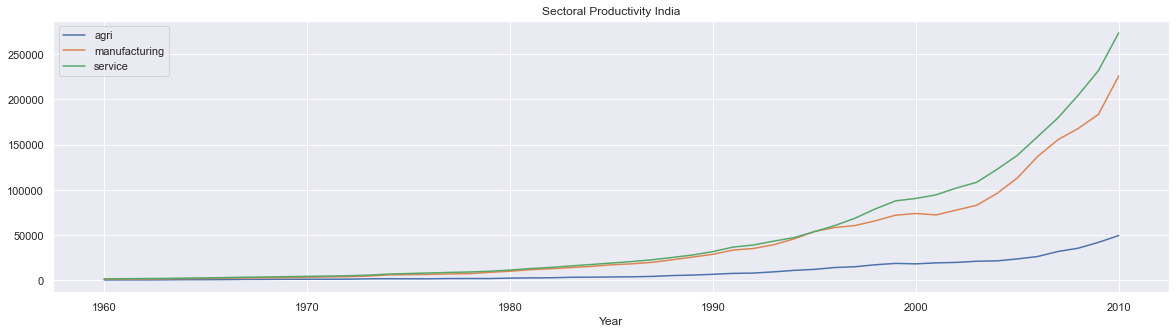

In [78]:
ind_prod.plot(figsize =(20, 5), title ='Sectoral Productivity India')

In [79]:
ind_prod['agri_norm'] = ind_prod.agri / ind_prod.agri[1980]
ind_prod['manu_norm'] = ind_prod.manufacturing / ind_prod.manufacturing[1980]
ind_prod['service_norm'] = ind_prod.service / ind_prod.service[1980] 

In [80]:
ind_prod['agri_gamma'] = ind_prod.agri.pct_change()
ind_prod['manu_gamma'] = ind_prod.manufacturing.pct_change()
ind_prod['service_gamma'] = ind_prod.service.pct_change()

In [81]:
ind_prod['agri_TFP'] = (1 + ind_prod.agri.pct_change()).cumprod()
ind_prod['manu_TFP'] = (1 + ind_prod.manufacturing.pct_change()).cumprod()
ind_prod['service_TFP'] = (1 + ind_prod.service.pct_change()).cumprod()

In [82]:
# ind_prod = ind_prod.dropna()

In [83]:
# ind_prod

In [84]:
dfs = {'ind_emp_share': df_emp_ind, 'ind_VA_share': df_VA_ind, 'ind_productivity': ind_prod}

In [85]:
"""
writer = pd.ExcelWriter('/users/quasar/downloads/JEDC_data.xlsx')

for name,dataframe in dfs.items():
    dataframe.to_excel(writer,name,index=True)

writer.save()
""";

<AxesSubplot:title={'center':'Sectoral Productivity Normalized'}, xlabel='Year'>

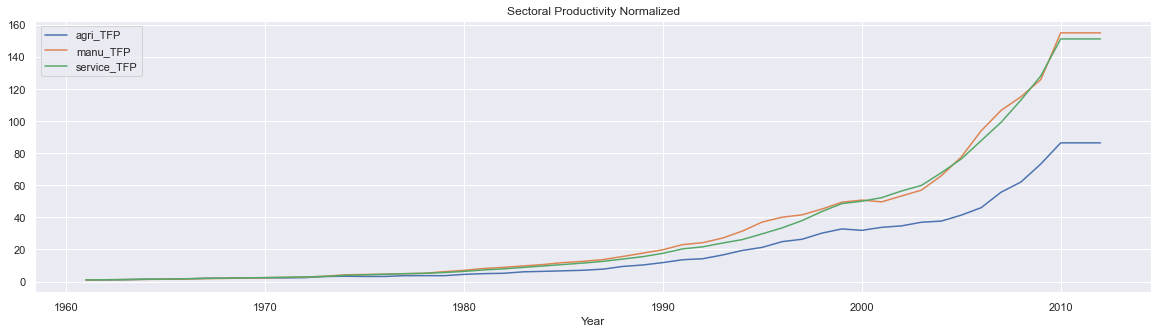

In [86]:
ind_prod[['agri_TFP', 'manu_TFP', 'service_TFP']].plot(figsize = (20,5), title ='Sectoral Productivity Normalized')

In [87]:
import seaborn as sns
sns.set_theme(style="darkgrid")

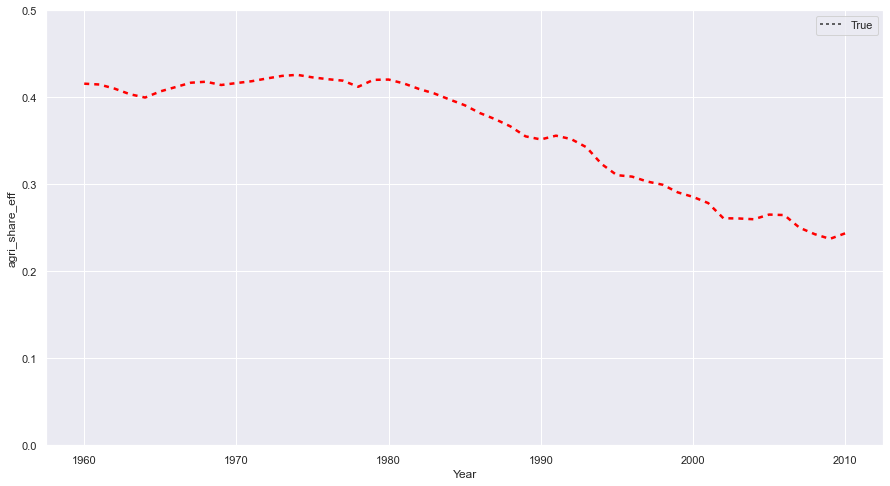

In [89]:
# use human capital ratio from table 1 to calculate values below 
df_ind_eff = df_emp.loc[(df_emp['Country'] == 'IND') & (df_emp['Year'] >= 1960) & (df_emp['Year'] <= 2010), ['Year', 'AGR', 'MIN','MAN','PU','CON','WRT','TRA','FIRE','GOV','OTH','agri_share']]
df_ind_eff['agri_eff'] = df_ind_eff.AGR
df_ind_eff['manufacturing_eff'] = (df_ind_eff.MIN + df_ind_eff.MAN) * 2.56
df_ind_eff['service_eff'] = (df_ind_eff.PU + df_ind_eff.CON + df_ind_eff.WRT + df_ind_eff.TRA + df_ind_eff.FIRE + df_ind_eff.GOV + df_ind_eff.OTH) * 4.17 
df_ind_eff['total_eff'] = df_ind_eff['agri_eff'] + df_ind_eff['manufacturing_eff'] + df_ind_eff['service_eff']
df_ind_eff['agri_share_eff'] = df_ind_eff.agri_eff / df_ind_eff.total_eff
df_ind_eff['manu_share_eff'] = df_ind_eff.manufacturing_eff / df_ind_eff.total_eff
df_ind_eff['service_share_eff'] = df_ind_eff.service_eff / df_ind_eff.total_eff

plt.figure(figsize=(15,8))
sns.lineplot(x="Year", y="agri_share_eff", data= df_ind_eff, 
             color = 'red', linewidth = 2.5, style=True, dashes=[(2,2)])
plt.ylim(0, 0.5)
plt.show()

In [90]:
df_ind_eff

,Year,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,agri_share,agri_eff,manufacturing_eff,service_eff,total_eff,agri_share_eff,manu_share_eff,service_share_eff
2235,1960,"126,807.64",907.59,"16,923.06",257.62,"2,625.77","8,273.98","3,076.33",408.52,"13,703.37","3,438.51",0.72,"126,807.64","45,646.48","132,539.69","304,993.81",0.42,0.15,0.43
2236,1961,"127,487.76",928.42,"17,519.79",284.84,"2,567.62","8,502.21","3,236.66",444.28,"13,191.91","3,576.04",0.72,"127,487.76","47,227.41","132,620.84","307,336.01",0.41,0.15,0.43
2237,1962,"127,795.00","1,001.40","17,874.32",308.51,"2,508.45","8,616.45","3,424.72",477.43,"13,443.18","3,724.88",0.71,"127,795.00","48,321.86","135,540.13","311,656.99",0.41,0.16,0.43
2238,1963,"127,848.76",992.38,"18,569.53",351.30,"2,645.97","8,887.39","3,569.26",510.69,"13,454.57","3,867.22",0.71,"127,848.76","50,078.47","138,804.28","316,731.51",0.40,0.16,0.44
2239,1964,"128,389.21",972.54,"18,915.13",370.98,"2,697.19","9,203.33","3,686.53",546.46,"13,465.70","4,034.97",0.70,"128,389.21","50,912.45","141,801.49","321,103.16",0.40,0.16,0.44
2240,1965,"130,695.87","1,064.48","18,437.26",401.37,"2,752.14","9,057.18","3,869.42",594.37,"12,776.60","4,259.06",0.71,"130,695.87","49,924.46","140,571.27","321,191.60",0.41,0.16,0.44
2241,1966,"132,765.44","1,064.82","17,908.76",426.63,"2,842.82","9,054.05","3,970.44",637.18,"12,423.92","4,462.34",0.72,"132,765.44","48,572.37","141,018.49","322,356.29",0.41,0.15,0.44
2242,1967,"134,868.04","1,071.99","17,326.23",463.01,"2,908.64","9,156.96","4,192.54",689.57,"11,860.28","4,676.51",0.72,"134,868.04","47,099.43","141,561.14","323,528.62",0.42,0.15,0.44
2243,1968,"136,214.05","1,071.16","17,521.35",508.44,"2,856.78","9,268.21","4,359.55",757.54,"11,449.22","4,862.66",0.72,"136,214.05","47,596.83","142,040.22","325,851.10",0.42,0.15,0.44
2244,1969,"136,635.47","1,084.71","18,463.31",535.09,"2,776.20","9,407.85","4,522.73",820.85,"11,237.94","5,030.06",0.72,"136,635.47","50,042.93","143,159.13","329,837.53",0.41,0.15,0.43


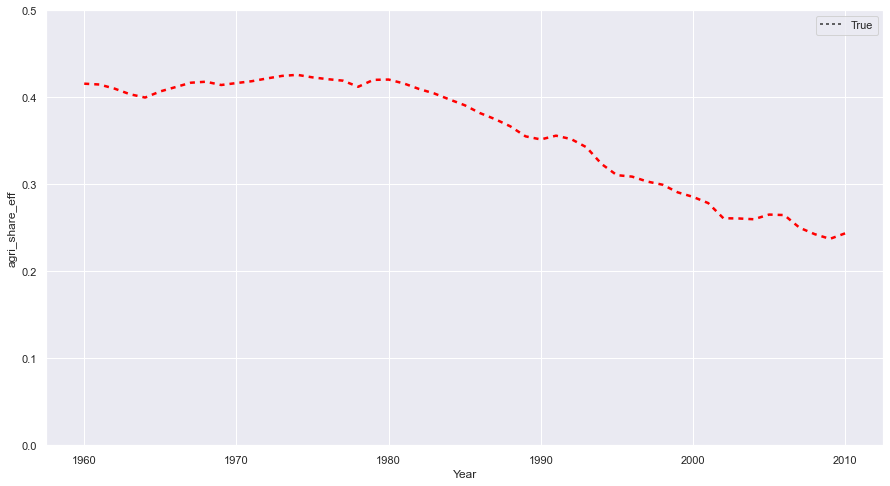

In [92]:
# use human capital ratio from table 1 to calculate values below 
df_ind_eff = df_emp.loc[(df_emp['Country'] == 'IND') & (df_emp['Year'] >= 1960) & (df_emp['Year'] <= 2010), ['Year', 'AGR', 'MIN','MAN','PU','CON','WRT','TRA','FIRE','GOV','OTH','agri_share']]
df_ind_eff['agri_eff'] = df_ind_eff.AGR
df_ind_eff['manufacturing_eff'] = (df_ind_eff.MIN + df_ind_eff.MAN) * 2.56
df_ind_eff['service_eff'] = (df_ind_eff.PU + df_ind_eff.CON + df_ind_eff.WRT + df_ind_eff.TRA + df_ind_eff.FIRE + df_ind_eff.GOV + df_ind_eff.OTH) * 4.17 
df_ind_eff['total_eff'] = df_ind_eff['agri_eff'] + df_ind_eff['manufacturing_eff'] + df_ind_eff['service_eff']
df_ind_eff['agri_share_eff'] = df_ind_eff.agri_eff / df_ind_eff.total_eff
df_ind_eff['manu_share_eff'] = df_ind_eff.manufacturing_eff / df_ind_eff.total_eff
df_ind_eff['service_share_eff'] = df_ind_eff.service_eff / df_ind_eff.total_eff

plt.figure(figsize=(15,8))
sns.lineplot(x="Year", y="agri_share_eff", data= df_ind_eff, 
             color = 'red', linewidth = 2.5, style=True, dashes=[(2,2)])
plt.ylim(0, 0.5)
plt.show()

In [93]:
# Calibration values for all countries 
ca_bar = 879.6 
cs_bar = 1552.7 
rho = 0.5 # elasticity of substitution 

# For india 
n_a = df_ind_eff.agri_share_eff
lambda_a = 0.1
lambda_m = 0.15
lambda_s = 0.75

# to be calculated for barrier change 
tau_m = 0.24
tau_s = 0.13

In [94]:
df_ind_eff = df_ind_eff.set_index('Year')

In [95]:
df_ind_eff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1960 to 2010
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGR                51 non-null     float64
 1   MIN                51 non-null     float64
 2   MAN                51 non-null     float64
 3   PU                 51 non-null     float64
 4   CON                51 non-null     float64
 5   WRT                51 non-null     float64
 6   TRA                51 non-null     float64
 7   FIRE               51 non-null     float64
 8   GOV                51 non-null     float64
 9   OTH                51 non-null     float64
 10  agri_share         51 non-null     float64
 11  agri_eff           51 non-null     float64
 12  manufacturing_eff  51 non-null     float64
 13  service_eff        51 non-null     float64
 14  total_eff          51 non-null     float64
 15  agri_share_eff     51 non-null     float64
 16  manu_share_eff     51 n

In [96]:
df_ind_eff.loc[df_ind_eff.index == 1980][['agri_share_eff', 'manu_share_eff', 'service_share_eff']]

,agri_share_eff,manu_share_eff,service_share_eff
Year,,,
1980,0.42,0.14,0.44


In [97]:
df_ind_eff

,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,agri_share,agri_eff,manufacturing_eff,service_eff,total_eff,agri_share_eff,manu_share_eff,service_share_eff
Year,,,,,,,,,,,,,,,,,,
1960,"126,807.64",907.59,"16,923.06",257.62,"2,625.77","8,273.98","3,076.33",408.52,"13,703.37","3,438.51",0.72,"126,807.64","45,646.48","132,539.69","304,993.81",0.42,0.15,0.43
1961,"127,487.76",928.42,"17,519.79",284.84,"2,567.62","8,502.21","3,236.66",444.28,"13,191.91","3,576.04",0.72,"127,487.76","47,227.41","132,620.84","307,336.01",0.41,0.15,0.43
1962,"127,795.00","1,001.40","17,874.32",308.51,"2,508.45","8,616.45","3,424.72",477.43,"13,443.18","3,724.88",0.71,"127,795.00","48,321.86","135,540.13","311,656.99",0.41,0.16,0.43
1963,"127,848.76",992.38,"18,569.53",351.30,"2,645.97","8,887.39","3,569.26",510.69,"13,454.57","3,867.22",0.71,"127,848.76","50,078.47","138,804.28","316,731.51",0.40,0.16,0.44
1964,"128,389.21",972.54,"18,915.13",370.98,"2,697.19","9,203.33","3,686.53",546.46,"13,465.70","4,034.97",0.70,"128,389.21","50,912.45","141,801.49","321,103.16",0.40,0.16,0.44
1965,"130,695.87","1,064.48","18,437.26",401.37,"2,752.14","9,057.18","3,869.42",594.37,"12,776.60","4,259.06",0.71,"130,695.87","49,924.46","140,571.27","321,191.60",0.41,0.16,0.44
1966,"132,765.44","1,064.82","17,908.76",426.63,"2,842.82","9,054.05","3,970.44",637.18,"12,423.92","4,462.34",0.72,"132,765.44","48,572.37","141,018.49","322,356.29",0.41,0.15,0.44
1967,"134,868.04","1,071.99","17,326.23",463.01,"2,908.64","9,156.96","4,192.54",689.57,"11,860.28","4,676.51",0.72,"134,868.04","47,099.43","141,561.14","323,528.62",0.42,0.15,0.44
1968,"136,214.05","1,071.16","17,521.35",508.44,"2,856.78","9,268.21","4,359.55",757.54,"11,449.22","4,862.66",0.72,"136,214.05","47,596.83","142,040.22","325,851.10",0.42,0.15,0.44


In [98]:
# ca_bar = 878.6 ; cs_bar = 1552.7 

rho = 0.5
lambda_a = 0.1
lambda_m = 0.15
lambda_s = 0.75

# for India
tau_m = 0.24 
tau_s = 0.13

agri_share = 0.42
manu_share = 0.14
service_share = 0.44

In [99]:
# initial assumption
ca_bar = 1 
cs_bar = 1

In [100]:
import sympy as sym
sym.init_printing()

In [101]:
term_1 = (1 + (cs_bar / A_s) - (ca_bar/ A_a))
term_2 = ca_bar / A_a
term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho)*((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) *((A_a/A_s)**(1-rho)))
n_a_calc = (term_1 / term_3) + term_2

In [102]:
x,y,z = sym.symbols('x,y,z')
c1 = sym.Symbol('c1')
f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)

sym.solve([f,g,h],(x,y,z))

/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/late

In [103]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(x**2 - 1, x)

/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/late

In [104]:
from sympy import Symbol, nsolve
import mpmath
mpmath.mp.dps = 15

In [105]:
x = Symbol('x')
solve(x**2 - 1, x)
x , y = sym.symbols('x, y')
eq_1 = (2*x + 4*y - 21)
eq_2 = (3*x + 6*y - 29)
print(nsolve((eq_1, eq_2), (x, y), (-2, 1)))

ZeroDivisionError: matrix is numerically singular

In [106]:
from sympy.core.symbol import symbols
from sympy.solvers.solveset import nonlinsolve
x, y, z = symbols('x, y, z', real=True)
nonlinsolve([x*y - 1, 4*x**2 + y**2 - 5], [x, y])
# {(-1, -1), (-1/2, -2), (1/2, 2), (1, 1)}

/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/late

In [107]:
# ca_bar = 878.6 ; cs_bar = 1552.7 ; initial value 800, 1500
A_a, A_m, A_s = sym.symbols('A_a, A_m, A_s')

f = sym.Eq((A_a * 0.42 - 870)/ (A_m * 0.14), ((0.1 * (A_a)**0.5)/(0.15 * ((1- 0.24)*A_m))**0.5)) 
g = sym.Eq((A_s * 0.44 + 1550)/ (A_m * 0.14), ((0.75 * ((1-0.13)*A_a)**0.5)/(0.15 * ((1- 0.24)*A_m))**0.5))
h = sym.Eq(0.42,  (870 / A_a)+ ((1 + (1550/A_s) - (870/A_a))/ (1 + ((0.15/0.1) * ((1 - 0.24)**0.5)*((A_a/A_m)**(1-0.5))) + ((0.75/0.1) * ((1 - 0.13)**0.5) *((A_a/A_s)**(1-0.5))))))

In [108]:
# ca_bar = 80, cs_bar = 150 (870, 1550)
# remaining values from 1980 India and paper 
A_a, A_m, A_s = symbols('A_a, A_m, A_s', real=True)
nonlinsolve([(A_a * 0.42 - 87)/ (A_m * 0.14) - ((0.1 * (A_a)**0.5)/(0.15 * ((1- 0.24)*A_m))**0.5),
             (A_s * 0.44 + 155)/ (A_m * 0.14) - ((0.75 * ((1-0.13)*A_a)**0.5)/(0.15 * ((1- 0.24)*A_m))**0.5),
             (0.42 - (87 / A_a)+ ((1 + (155/A_s) - (87/A_a))/ (1 + ((0.15/0.1) * ((1 - 0.24)**0.5)*((A_a/A_m)**(1-0.5))) + ((0.75/0.1) * ((1 - 0.13)**0.5) *((A_a/A_s)**(1-0.5))))))],
             [A_a, A_m, A_s])

/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/late


1. Relative price (JEDC)
2. Alternative calibration QJE paper
3. Match sectoral labour share and model - whatever 
Approach ( matching using calibrated ) 
Rachel 
4. Distortion - 

In [47]:
# sym.solve([f, g, h], (A_a, A_m, A_s))

In [48]:
A_a = A_m = 15000
A_s = (0.65924041366561* (A_a**0.5) * (A_m**0.5)) - 352.272727272727

pa_pm = ((1 - tau_m) * A_m) / A_a
ps_pm = ((1 - tau_m) * A_m) / ((1- tau_s) * A_s)
pa_pm, ps_pm

/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/late

In [ ]:
#ind_prod['tau_m'] = 1 - (ind_prod['agri'] / (2.56 * ind_prod['manufacturing']))
#ind_prod['tau_s'] = 1 - (ind_prod['agri'] / (4.17 * ind_prod['service']))

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def func(X, ca_bar, cs_bar, tau_m, tau_s, lambda_a, lambda_m, lambda_s, rho):
          A_a, A_m, A_s = X 
          term_1 = (1 + (cs_bar / A_s) - (ca_bar/ A_a))
          term_2 = ca_bar / A_a
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho)*((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) *((A_a/A_s)**(1-rho)))
          n_a_calc = (term_1 / term_3) + term_2
          return n_a_calc

In [ ]:
def func1(emp_share, A_a, A_m, A_s):
          n_a, n_m, n_s = emp_share
          term_1 = (1 + (cs_bar / A_s) - (ca_bar/ A_a))
          term_2 = ca_bar / A_a
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho )*((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) *((A_a/A_s)**(1-rho)))
          n_a_calc = (term_1 / term_3) + term_2
          return n_a_calc

In [ ]:
ind_prod

,agri,manufacturing,service,agri_norm,manu_norm,service_norm,agri_gamma,manu_gamma,service_gamma,agri_TFP,manu_TFP,service_TFP
Year,,,,,,,,,,,,
1980,"2,581.11","10,211.08","11,516.25",1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
1981,"2,850.98","11,909.84","13,139.61",1.10,1.17,1.14,0.10,0.17,0.14,1.10,1.17,1.14
1982,"2,977.42","12,960.78","14,394.62",1.15,1.27,1.25,0.04,0.09,0.10,1.15,1.27,1.25
1983,"3,508.30","14,228.40","16,022.47",1.36,1.39,1.39,0.18,0.10,0.11,1.36,1.39,1.39
1984,"3,670.24","15,531.93","17,619.45",1.42,1.52,1.53,0.05,0.09,0.10,1.42,1.52,1.53
1985,"3,864.72","17,287.80","19,269.86",1.50,1.69,1.67,0.05,0.11,0.09,1.50,1.69,1.67
1986,"4,058.29","18,383.40","20,897.97",1.57,1.80,1.81,0.05,0.06,0.08,1.57,1.80,1.81
1987,"4,469.08","20,015.25","22,850.46",1.73,1.96,1.98,0.10,0.09,0.09,1.73,1.96,1.98
1988,"5,436.25","22,854.37","25,426.71",2.11,2.24,2.21,0.22,0.14,0.11,2.11,2.24,2.21


For the purpose of this paper, however, it suffices that the ratio of value added per worker between sectors is a good proxy for the ratio of wage. This is true if labor income share is roughly the same across sectors.

It should also be noted that this measure of wage wedges is subject to measurement errors if value added is mis-measured. In fact, Herrendorf and Schoellman (2015) and Cai and Pandey (2015) show that in many countries under-reporting of self-employment income could lead to agricultural value added that is substantially under- measured. In this case, the computed wage wedges are likely inflated as well. In Section 3.4 I provide a further discussion on alternative ways of measuring wage wedges.

Text(0.5, 1.0, 'Distortion tau_m and tau_s time series plot for India')

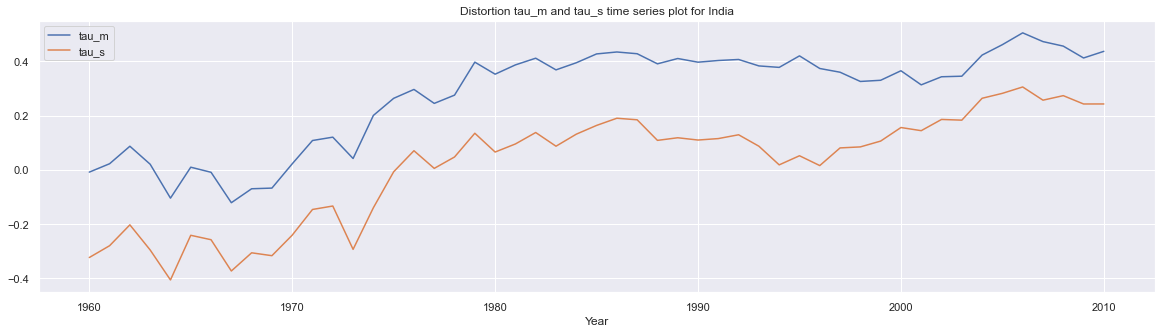

In [109]:
hm_ha = 2.56
hs_ha = 4.17
ind_prod['tau_m'] = 1 - ((ind_prod['agri']/ ind_prod['manufacturing']) * hm_ha)
ind_prod['tau_s'] = 1 - ((ind_prod['agri']/ ind_prod['service']) * hs_ha)
ind_prod[['tau_m', 'tau_s']].plot(figsize =(20,5))
plt.title("Distortion tau_m and tau_s time series plot for India")

In [50]:
ind_prod.to_excel("/users/quasar/downloads/data_set.xlsx")

In [51]:
ind_prod['tau_m'].mean(), ind_prod['tau_m'].std()
ind_prod['tau_s'].mean(), ind_prod['tau_s'].std()

/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/late

In [52]:
lambda_a = 0.1
lambda_m = 0.15
lambda_s = 0.75
rho = 0.5

ca_bar = 879.6 
cs_bar = 1552.7 

def func_reloaded(X, A_a, A_m, A_s):
          tau_m, tau_s = X 
          term_1 = (1 + (cs_bar / A_s) - (ca_bar/ A_a))
          term_2 = ca_bar / A_a
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho)*((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) *((A_a/A_s)**(1-rho)))
          n_a_calc = (term_1 / term_3) + term_2
          return n_a_calc

In [53]:
parameters, covariance = curve_fit(func_reloaded, (ind_prod.tau_m, ind_prod.tau_s), n_a, bounds=([-np.inf, -np.inf, -np.inf], [+np.inf, +np.inf, +np.inf]))
                              

parameters

NameError: name 'curve_fit' is not defined

In [54]:
A_a = ind_prod['agri_norm']
A_m = ind_prod['manu_norm']
A_s = ind_prod['service']

n_a = df_ind_eff['agri_share_eff']

In [55]:
# ca_bar = 879.6 
# cs_bar = 1552.7 

In [56]:
parameters, covariance = curve_fit(func, (A_a, A_m, A_s), n_a, bounds=([0, 0, -1, -1, 0, 0, 0, -np.inf], 
                                                                   [+np.inf, +np.inf, +1, +1, 1, 1, 1, +np.inf]))

# parameters, covariance = curve_fit(func, (A_a, A_m, A_s), n_a)

NameError: name 'curve_fit' is not defined

In [57]:
parameters

NameError: name 'parameters' is not defined

In [58]:
ca_bar = parameters[0]
cs_bar = parameters[1]
tau_m  = parameters[2]
tau_s  = parameters[3]
lambda_a = parameters[4] 
lambda_m = parameters[5]
lambda_s = parameters[6]
rho = parameters[7]

# ca_bar = 879.6 
# cs_bar = 1552.7 

for i in range(26):
          term_1 = (1 + (cs_bar / A_s) - (ca_bar/ A_a))
          term_2 = ca_bar / A_a
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho)*((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) *((A_a/A_s)**(1-rho)))
          df_ind_eff['n_a_calc'] = ((term_1 / term_3) + term_2)


NameError: name 'parameters' is not defined

In [59]:
n_a 

Year
1980   0.42
1981   0.42
1982   0.41
1983   0.40
1984   0.40
1985   0.39
1986   0.38
1987   0.37
1988   0.37
1989   0.36
1990   0.35
1991   0.36
1992   0.35
1993   0.34
1994   0.32
1995   0.31
1996   0.31
1997   0.30
1998   0.30
1999   0.29
2000   0.29
2001   0.28
2002   0.26
2003   0.26
2004   0.26
2005   0.27
Name: agri_share_eff, dtype: float64

<AxesSubplot:xlabel='Year'>

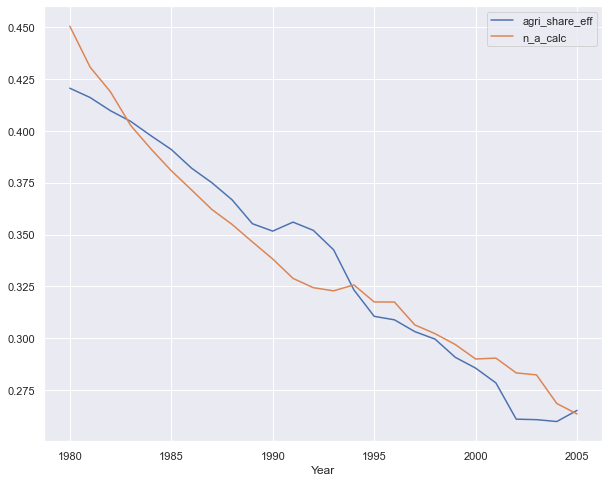

In [ ]:
df_ind_eff[['agri_share_eff', 'n_a_calc']].plot(figsize = (10, 8))

<AxesSubplot:xlabel='Year'>

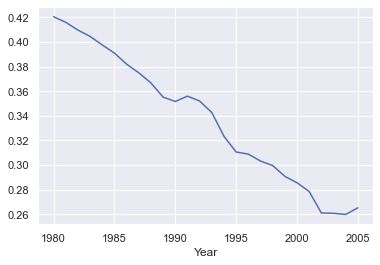

In [ ]:
n_a.plot()

In [ ]:
# A_m = 1
# A_s = 1

In [ ]:
def func_2(X, ca_bar, cs_bar):
          A_a, A_m, A_s = X 
          term_1 = (1 + (cs_bar / A_s) - (ca_bar/ A_a))
          term_2 = ca_bar / A_a
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho)*((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) *((A_a/A_s)**(1-rho)))
          n_a_calc = (term_1 / term_3) + term_2
          return n_a_calc

In [ ]:
# data for 1980 

# given 
lambda_a = 0.1
lambda_m = 0.15
lambda_s = 0.75
rho = 0.5

# from calculation in paper for 1980 - formula is given in paper - follow difference procedure for India comparing US
tau_m = 0.35
tau_s = 0.07

A_a = 15000
A_m = 20000
A_s = 15000

# take from paper for convience - must not be done so
ca_bar = 878.6
cs_bar = 1552.7

df_ind_eff['agri_share_eff'][1980], df_ind_eff['manu_share_eff'][1980], df_ind_eff['service_share_eff'][1980];

In [ ]:
# match this (0.420513139373562, 0.1413249992901, 0.438161861336337)
term_1 = (1 + (cs_bar / A_s) - (ca_bar/ A_a))
term_2 = ca_bar / A_a
term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho)*((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) *((A_a/A_s)**(1-rho)))
n_a_calc = (term_1 / term_3) + term_2

term_4 = (A_a * n_a_calc) - ca_bar
term_5 = ((1 - tau_s) * (A_s/A_a))**rho
term_6 = lambda_s / lambda_a

n_s_calc = ((term_4 * term_6 * term_5) - cs_bar) / A_s  

n_m_calc = 1 - n_a_calc - n_s_calc

print(n_a_calc, n_m_calc, n_s_calc) # initially try to match this sectoral share of labour 

pa_pm = ((1 - tau_m) * A_m) / A_a
ps_pm = ((1 - tau_m) * A_m) / ((1- tau_s) * A_s)

pa_pm_data = 0.16/ 0.18
ps_pm_data = 0.15/ 0.18
print(pa_pm, ps_pm, pa_pm_data, ps_pm_data) # ultimate goal is to match relative price of data 


0.17117394605210043 0.11792864888102428 0.7108974050668753
0.8666666666666667 0.9318996415770611 0.888888888888889 0.8333333333333334


In [ ]:
price_ind.loc[price_ind.index == 1980][['agri_price', 'manu_price', 'service_price']]

,agri_price,manu_price,service_price
Year,,,
1980,0.16,0.18,0.15


### try this

use 5 equation and find 5 unknowns 

The last exogenous variable is TFP for each sector: fAa;Am;Asg. I use the model to infer these sequences. The basic idea is to pick these sequences such that the model reproduces the time paths of sectoral shares of labor and real aggregate GDP per worker observed in the data (both converted to efficiency units). Therefore, the model by construction replicates the process of structural change in the data.
How about sectoral shares of value added? It turns out that for India, Mexico and Brazil, matching labor shares in the data implies also that the model matches the value added shares in the data. This is by the virtue of the way wage wedges are computed for these countries.6 For the U.S., the model matches value added shares well in the data by implication (see Section Appendix B of the Appendix). Therefore, in the counterfactual exercises that follow I could restrict my attention to only the labor allocation aspect of structural change.
With the inferred sequence of TFP, the model generates testable implications about the relative prices of output. Table 3 presents the annual percentage change of the price of output in agriculture and services relative to that in manufacturing, both in the data and in the model. To derive the price level of output by sector in the data, I divide value added in current prices by the value added in constant prices.7 These price levels are then used to calculate the relative prices and their growth rates. It is reassuring that the model delivers changes in relative prices that are quantitatively consistent with those in the data. For example, the relative price of services has been increasing in all countries and that of agriculture has been increasing in all countries except Mexico. The model generates both observations.

In [ ]:
# use for 5 equation and 5 unknown solution 
from sympy.core.symbol import symbols
from sympy.solvers.solveset import nonlinsolve

# data for 1980 

# given 
lambda_a = 0.1
lambda_m = 0.15
lambda_s = 0.75
rho = 0.5

# from calculation in paper for 1980 - formula is given in paper - follow difference procedure for India comparing US
tau_m = 0.35
tau_s = 0.07

pa_pm_data = 0.16/ 0.18
ps_pm_data = 0.15/ 0.18

n_a = df_ind_eff['agri_share_eff'][1980]
n_m = df_ind_eff['manu_share_eff'][1980]
n_s = df_ind_eff['service_share_eff'][1980]

ca_bar, cs_bar, A_a, A_m, A_s = symbols('ca_bar, cs_bar, A_a, A_m, A_s', real=True)

# equal to zero below 
nonlinsolve([ 
          pa_pm_data - ((1 - tau_m) * (A_m/A_a)), 
          ps_pm_data - (((1 - tau_m)/(1- tau_s)) * (A_m/A_s)), 
          ((A_a * n_a - ca_bar) / (A_m * n_m)) - ( (lambda_a / lambda_m) * ( ( A_a /A_m)/(1-tau_m) )**rho ), 
          ((A_s * n_s + cs_bar) / (A_m * n_m)) - ( (lambda_s / lambda_m) * ( ( A_s * (1-tau_s)) / (A_m *(1-tau_m)) )**rho ),
          n_a - (ca_bar/A_a) - ( (1 + (cs_bar/A_s) - (ca_bar/A_a)) / ( 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho)))))
          
          # n_a - (ca_bar/A_a) - ((1 + (cs_bar / A_s) - (ca_bar/ A_a)) / (1 + ( (lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho)) ) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho))))),
          ],  
          [ca_bar, cs_bar, A_a, A_m, A_s])

/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/quasar/Library/Python/3.9/lib/python/site-packages/IPython/lib/late

In [ ]:
# match this (0.420513139373562, 0.1413249992901, 0.438161861336337)
cs_bar = 1552.7 # growth rate of aggregate productivity matching - to avoid arbitrary picking of cs_bar 
ca_bar = cs_bar * 0.510524944836398

A_a = cs_bar * 1.79854652149833
A_m = cs_bar * 2.45955079863019
A_s = cs_bar * 2.06284905691564

term_1 = (1 + (cs_bar / A_s) - (ca_bar/ A_a))
term_2 = ca_bar / A_a
term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho)*((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) *((A_a/A_s)**(1-rho)))
n_a_calc = (term_1 / term_3) + term_2

term_4 = (A_a * n_a_calc) - ca_bar
term_5 = ((1 - tau_s) * (A_s/A_a))**rho
term_6 = lambda_s / lambda_a

n_s_calc = ((term_4 * term_6 * term_5) - cs_bar) / A_s  

n_m_calc = 1 - n_a_calc - n_s_calc

print(n_a_calc, n_m_calc, n_s_calc) # initially try to match this sectoral share of labour 

pa_pm = ((1 - tau_m) * A_m) / A_a
ps_pm = ((1 - tau_m) * A_m) / ((1- tau_s) * A_s)

pa_pm_data = 0.16/ 0.18
ps_pm_data = 0.15/ 0.18
print(pa_pm, ps_pm, pa_pm_data, ps_pm_data)

0.4205131393735617 0.14132499929010067 0.4381618613363376
0.8888888888888871 0.8333333333333347 0.888888888888889 0.8333333333333334


In [ ]:
n_a_calc_agri = []
for A_a in range (0, 26, 1):
          term_1 = (1 + (cs_bar / A_s) - (ca_bar/ ind_prod['agri']))
          term_2 = ca_bar / ind_prod['agri']
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho )*((ind_prod['agri']/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) *((ind_prod['agri_TFP']/A_s)**(1-rho)))
          n_a_calc = (term_1 / term_3) + term_2
          n_a_calc_agri.append(n_a_calc)

In [ ]:
n_a_calc_agri

[Year
 1980    NaN
 1981   0.83
 1982   0.82
 1983   0.77
 1984   0.76
 1985   0.74
 1986   0.73
 1987   0.71
 1988   0.66
 1989   0.63
 1990   0.60
 1991   0.57
 1992   0.56
 1993   0.53
 1994   0.50
 1995   0.48
 1996   0.45
 1997   0.44
 1998   0.41
 1999   0.40
 2000   0.40
 2001   0.39
 2002   0.39
 2003   0.38
 2004   0.38
 2005   0.36
 dtype: float64,
 Year
 1980    NaN
 1981   0.83
 1982   0.82
 1983   0.77
 1984   0.76
 1985   0.74
 1986   0.73
 1987   0.71
 1988   0.66
 1989   0.63
 1990   0.60
 1991   0.57
 1992   0.56
 1993   0.53
 1994   0.50
 1995   0.48
 1996   0.45
 1997   0.44
 1998   0.41
 1999   0.40
 2000   0.40
 2001   0.39
 2002   0.39
 2003   0.38
 2004   0.38
 2005   0.36
 dtype: float64,
 Year
 1980    NaN
 1981   0.83
 1982   0.82
 1983   0.77
 1984   0.76
 1985   0.74
 1986   0.73
 1987   0.71
 1988   0.66
 1989   0.63
 1990   0.60
 1991   0.57
 1992   0.56
 1993   0.53
 1994   0.50
 1995   0.48
 1996   0.45
 1997   0.44
 1998   0.41
 1999   0.40
 2000   0.40

In [ ]:
df_ind_eff

,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,agri_share,agri_eff,manufacturing_eff,service_eff,total_eff,agri_share_eff,manu_share_eff,service_share_eff
Year,,,,,,,,,,,,,,,,,,
1980,"188,501.92","1,007.76","23,738.83",762.01,"3,044.82","13,289.43","6,400.05",992.67,"15,348.25","7,264.26",0.72,"188,501.92","63,351.25","196,413.25","448,266.43",0.42,0.14,0.44
1981,"192,718.30","1,127.86","24,983.46",778.70,"3,311.06","14,285.44","6,581.98","1,010.16","15,284.97","7,590.09",0.72,"192,718.30","66,844.97","203,672.77","463,236.04",0.42,0.14,0.44
1982,"196,688.84","1,249.47","25,836.52",787.13,"3,241.21","15,188.25","6,696.75","1,054.82","16,416.47","7,949.05",0.71,"196,688.84","69,340.14","214,061.40","480,090.38",0.41,0.14,0.45
1983,"200,667.76","1,270.06","27,554.14",801.56,"3,558.96","16,087.33","6,943.76","1,089.10","16,492.89","8,166.88",0.71,"200,667.76","73,789.97","221,595.81","496,053.54",0.40,0.15,0.45
1984,"204,459.46","1,278.26","28,426.08",837.62,"3,786.30","16,863.54","7,365.24","1,127.42","17,618.37","8,449.96",0.70,"204,459.46","76,043.13","233,722.03","514,224.63",0.40,0.15,0.45
1985,"208,392.84","1,332.39","28,660.16",859.46,"4,080.96","18,334.13","7,799.60","1,174.98","18,417.53","8,759.62",0.70,"208,392.84","76,780.92","247,807.60","532,981.36",0.39,0.14,0.46
1986,"211,791.20","1,496.93","29,638.13",895.01,"4,381.29","19,501.02","8,066.63","1,231.64","19,589.79","9,390.73",0.69,"211,791.20","79,705.76","262,943.95","554,440.90",0.38,0.14,0.47
1987,"215,590.83","1,530.70","30,797.57",912.98,"4,629.14","20,471.91","8,526.81","1,266.11","20,917.98","9,602.93",0.69,"215,590.83","82,760.38","276,587.19","574,938.40",0.37,0.14,0.48
1988,"218,847.93","1,735.75","32,336.32",951.74,"5,091.49","21,992.40","8,767.76","1,337.37","21,565.15","10,012.71",0.68,"218,847.93","87,224.50","290,726.68","596,799.11",0.37,0.15,0.49


TypeError: unhashable type: 'Series'

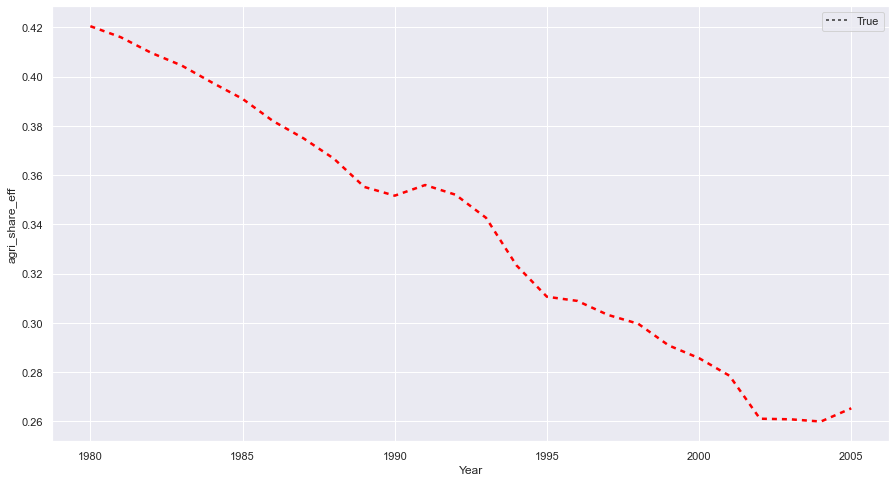

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Year", y="agri_share_eff", data= df_ind_eff, 
             color = 'red', linewidth = 2.5, style=True, dashes=[(2,2)]) 
sns.lineplot(x=df_ind_eff.index, y = n_a_calc_agri,
           color = 'blue', linewidth = 2.5, style = True, dashes =[(2,2)])  
"""
sns.lineplot(x='Year', y = n_a_calc_manu, data= df_ind_eff, 
           color = 'yellow', linewidth = 2.5, style = True, dashes =[(2,2)]) 
sns.lineplot(x='Year', y = n_a_calc_service, data= df_ind_eff, 
           color = 'orange', linewidth = 2.5, style = True, dashes =[(2,2)]) 
"""
c      
plt.ylim(0, 0.5)
plt.legend()
plt.show()

- Equation 9 , 10, 11 for n_a , n_m and n_s  calculation 

- Agr = Agregate producticvity = n_a * A_a + n_m * A_m + n_s * A_s (matching)

- parameter to estimate - cs_bar, ca_bar , rho = (-np.inf, 1), lambda_a, lambda_m, lambda_s , tau_m, tau_s

- labour share matching and aggregate productivity matching 

- fit for 1980 n_a, n_m -> get ca_bar and cs_bar as function of other 5 parameters 
replace value of ca_bar and cs_bar from 1981 onwards



In [ ]:
parameters = list(nonlinsolve([
          pa_pm_data.iloc[6] - ((1 - tau_m.iloc[6]) * (A_m/A_a)), 
          ps_pm_data.iloc[6] - (((1 - tau_m.iloc[6])/(1- tau_s.iloc[6])) * (A_m/A_s)),
          #((A_a * n_a.iloc[1] - ca_bar) / (A_m * n_m.iloc[1])) - ((lambda_a / lambda_m) * ((A_a/A_m)/(1-tau_m.iloc[1]))**rho), 
          #((A_s * n_s.iloc[1] + cs_bar) / (A_m * n_m.iloc[1])) - ((lambda_s / lambda_m) * ((A_s*(1-tau_s.iloc[1])) / (A_m *(1-tau_m.iloc[1])))**rho),
          #n_a.iloc[1] + n_m.iloc[1] + n_s.iloc[1] - 1, 
          n_a.iloc[6] - (ca_bar/A_a) - ((1 + (cs_bar / A_s) - (ca_bar/ A_a)) / (1 + ( (lambda_m/lambda_a) * ((1 - tau_m.iloc[6])**rho) * ((A_a/A_m)**(1-rho)) ) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[6])**rho) * ((A_a/A_s)**(1-rho))))),
          ],
          [A_a, A_m, A_s]))

In [ ]:
x, y, z = symbols('x, y, z', real=True)
nonlinsolve([ x+y+z-1, 
          x**2 + y**2 + z**2 - 1, 
          x**3 + y**3 + z**3 - 1,          
          ],
          [x, y, z])